## ****Import Dependencies****

In [1062]:
import pandas as pd           
import numpy as np                  
import seaborn as sns        
import matplotlib.pyplot as plt     
import warnings 
    
pd.set_option('display.max_rows',100)
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight') 

## ****Load Dataset****

In [1063]:
data=pd.read_csv('ebola_data_db_format.csv')

## ****Data Understanding****

**i) Brief Informational Summary about the Dataset**

In [1064]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17585 entries, 0 to 17584
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Indicator  17585 non-null  object 
 1   Country    17585 non-null  object 
 2   Date       17585 non-null  object 
 3   value      17585 non-null  float64
dtypes: float64(1), object(3)
memory usage: 549.7+ KB


**ii) Brief Descriptive Statistics about the Dataset**

In [1065]:
data.describe(include='all')

,Indicator,Country,Date,value
count,17585,17585,17585,17585.000000
unique,36,12,259,NaN
top,"Cumulative number of confirmed, probable and s...",Sierra Leone,2014-09-05,NaN
freq,2485,2303,126,NaN
mean,NaN,NaN,NaN,955.857987
std,NaN,NaN,NaN,2313.569259
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,287.000000


**iii) Total Number of Unique Records in each column of the Dataset**

In [1066]:
data.nunique()

Indicator      36
Country        12
Date          259
value        1793
dtype: int64

**iv) Total Number of Null / NA values in each column of the Dataset**

In [1067]:
data.isna().sum()

Indicator    0
Country      0
Date         0
value        0
dtype: int64

**v) Total Number of Duplicate Records in the Dataset**

In [1068]:
data.duplicated().sum()

0

**vi) Head of the DataFrame**

In [1069]:
data.head()

,Indicator,Country,Date,value
0,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,3285.0
1,Cumulative number of confirmed Ebola cases,Guinea,2015-03-10,2871.0
2,Cumulative number of probable Ebola cases,Guinea,2015-03-10,392.0
3,Cumulative number of suspected Ebola cases,Guinea,2015-03-10,22.0
4,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,2170.0


**vii) Tail of the DataFrame**

In [1070]:
data.tail()

,Indicator,Country,Date,value
17580,"Cumulative number of confirmed, probable and s...",Spain,2016-03-23,0.0
17581,Cumulative number of confirmed Ebola deaths,United States of America,2016-03-23,1.0
17582,Cumulative number of probable Ebola deaths,United States of America,2016-03-23,0.0
17583,Cumulative number of suspected Ebola deaths,United States of America,2016-03-23,0.0
17584,"Cumulative number of confirmed, probable and s...",United States of America,2016-03-23,1.0


## ****Data Preprocessing****

**Format column names to lower case for easier accessibility**

In [1071]:
data.columns=data.columns.str.lower()

**Format `Date` to DateTime and `value` to Integer**

In [1072]:
data['date']=pd.to_datetime(data['date'])

In [1073]:
data['value']=data['value'].astype(int)

In [1074]:
data.rename(columns={
    'value':'cases'
    },inplace=True)

**Update `Liberia` and `Guinea` within the feature Country**

In [1075]:
data['country']=data['country'].str.replace('Liberia 2','Liberia').str.replace('Guinea 2','Guinea')

## ****Exploratory Data Analysis****

**Perform an Exploratory Data Analysis on the number of Confirmed Death Cases due to Ebola**

In [1076]:
data=data.query('indicator == "Cumulative number of confirmed Ebola deaths"').reset_index(drop=True)

**Feature Creation**

In [1077]:
feature=data.copy()
feature['year']=feature['date'].dt.year.astype(int)
feature['month']=feature['date'].dt.month.astype(int)
feature['day']=feature['date'].dt.day.astype(int)

#### **1) Estimates of Location**

**Mean**

In [1078]:
print(f"Average Number of Cases : {data['cases'].mean():,.0f}")

Average Number of Cases : 782


**Trimmed Mean**

In [1079]:
from scipy.stats import trim_mean
print(f"Trimmed Mean : {trim_mean(data['cases'].sort_values(ascending=False),0.1):,.0f}")

Trimmed Mean : 531


**Weighted Mean**

In [1080]:
print(f"Weighted Mean : {np.average(feature['cases'],weights=feature['year']):,.0f}")

Weighted Mean : 782


**Median**

In [1081]:
print(f"Average Number of Cases : {data['cases'].median():,.0f}")

Average Number of Cases : 2


**Weighted Median**

In [1082]:
import wquantiles as wq 
print(f"Weighted Median : {wq.median(feature['cases'],weights=feature['year']):,.0f}")

Weighted Median : 2


*The average number of confirmed death cases is 782 according to both the mean and weighted mean.<br/>
Both the Median and Weighted Median have an average of 2, this is expected since median mainly focuses on the position i.e `the middle number`<br/>
This is a perfect use case showing why the mean is most widely used even though its susceptible to outliers.*

#### ****2) Estimates of Variability/Dispersion****

**Variance**

In [1083]:
print(f"Variance of Number of Confirmed Cases : {data['cases'].var()}")

Variance of Number of Confirmed Cases : 1582848.5675422656


**Standard Deviation**

In [1084]:
print(f"Standard Deviation of Number of Cases : {data['cases'].std():,.0f}")

Standard Deviation of Number of Cases : 1,258


**Mean Absolute Deviation**

In [1085]:
print(f"Median Absolute Deviation : {np.average(np.absolute(data['cases']-data['cases'].mean())):,.0f}")

Median Absolute Deviation : 1,067


**Median Absolute Deviation**

In [1086]:
print(f"Median Absolute Deviation : {np.average(np.absolute(data['cases']-data['cases'].median())):,.0f}")

Median Absolute Deviation : 781


**Interquartile Range**

In [1087]:
iqr1,iqr2=np.percentile(data['cases'],[75,25])
print(f"Interquartile Range : {np.subtract(iqr1,iqr2):,.0f}")

Interquartile Range : 1,761


*The Median is very compared to the other metrics since its robust to outliers.*

#### ****3) Exploring Data Distribution****

**BoxPlot**

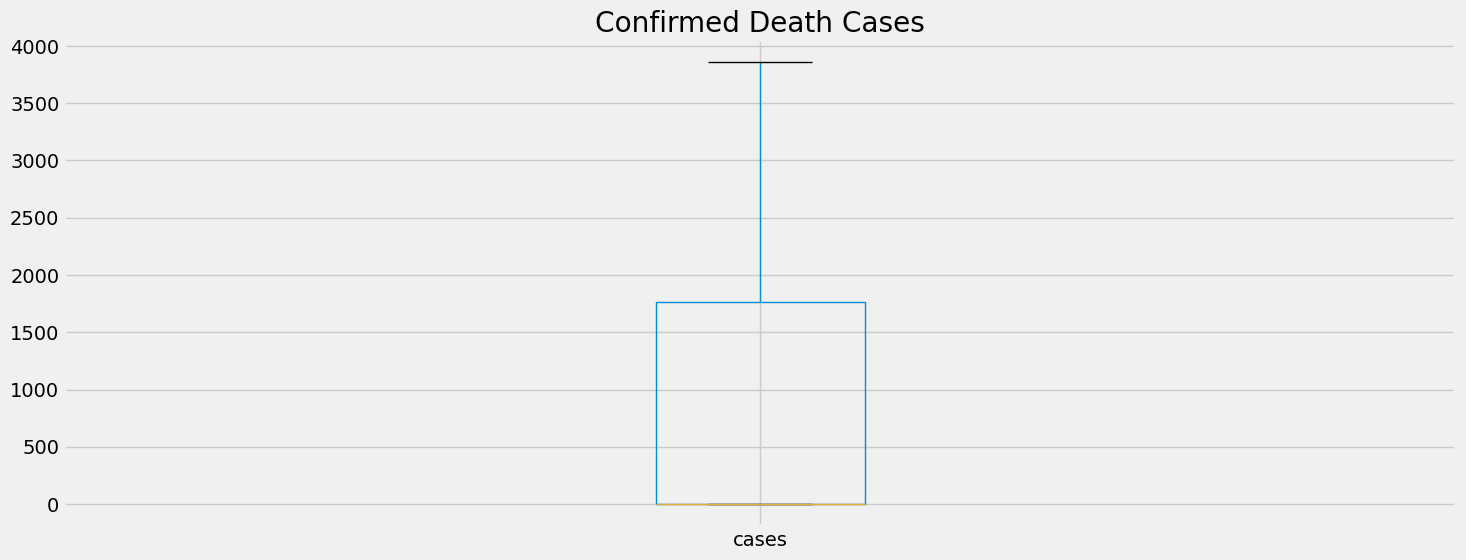

In [1088]:
data.boxplot(column=['cases'],figsize=(16,6))
plt.title('Confirmed Death Cases')
plt.show()

*The 50th percentile is very close to zero thus backing up the median value of 2 in the first section.<br/>This is expected since the 50th percentile is the Median value.*

**Percentile**

In [1089]:
data['cases'].quantile([0.05,0.1,0.2,0.25,0.5,0.75,1.0])

0.05       0.00
0.10       0.00
0.20       0.00
0.25       0.00
0.50       2.00
0.75    1760.75
1.00    3858.00
Name: cases, dtype: float64

*The 75th percentile has a value of 1760.75 which is the same result as the interquartile range since the 25th percentile is 0.*

**Histogram**

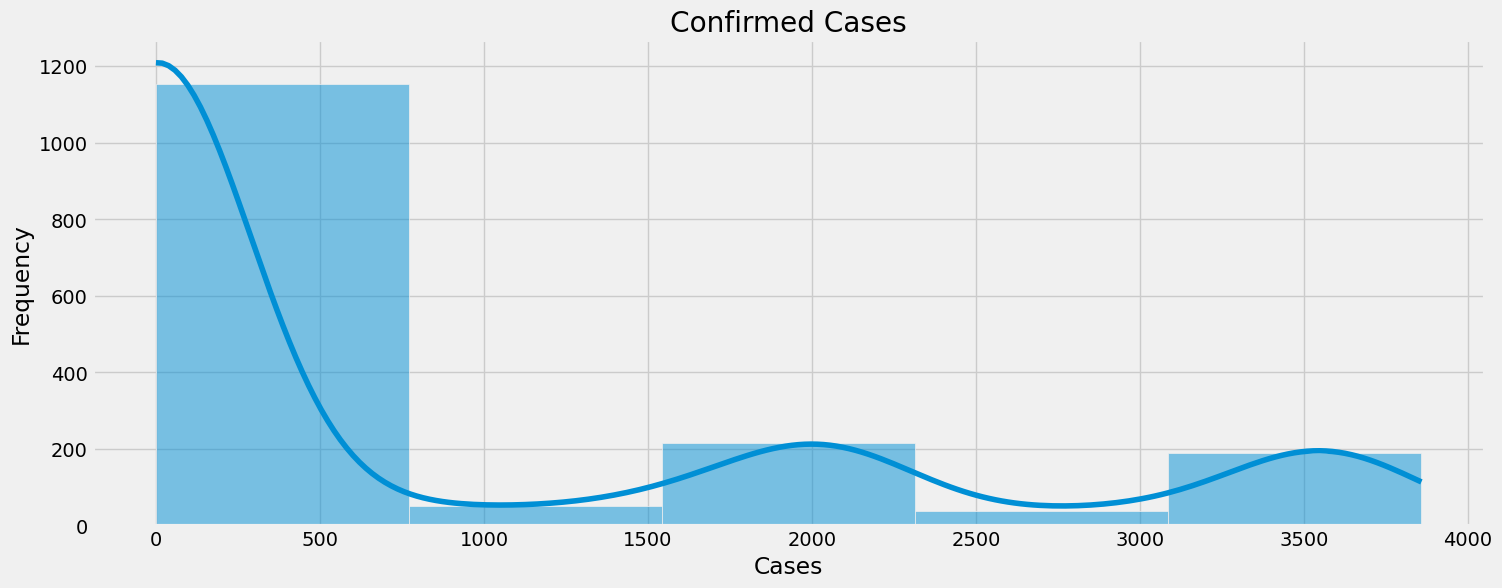

In [1090]:
plt.figure(figsize=(16,6))
sns.histplot(x=data['cases'],kde=True,bins=5)
plt.title('Confirmed Cases')
plt.xlabel('Cases')
plt.ylabel('Frequency')
plt.show()

*Confirmed Number of Death Cases has a multimodal distribution i.e `more than one node`.*

#### ****4) Exploring Two or More Variables****

**i) BarPlot**

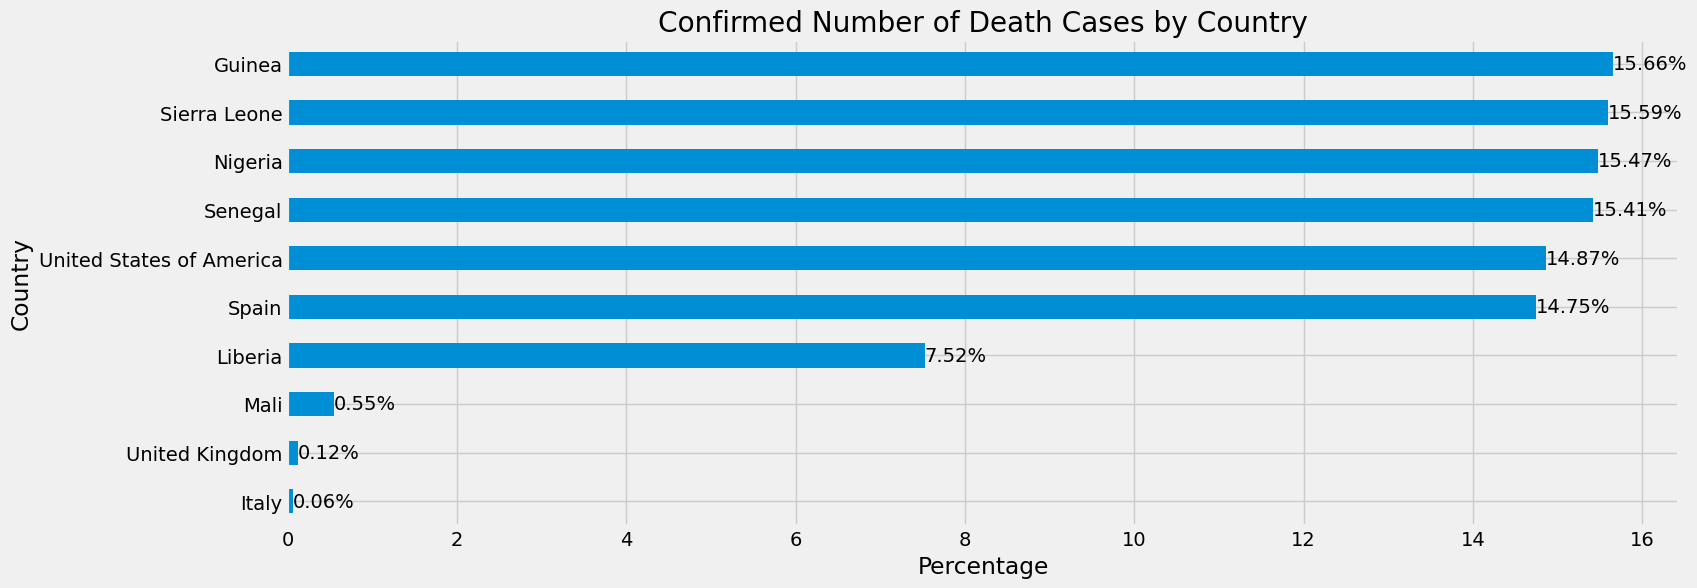

In [1091]:
ax=(data['country'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,6))
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
    
plt.xlabel('Percentage')
plt.ylabel('Country')
plt.title('Confirmed Number of Death Cases by Country')
plt.show()

*Sierra Leone, Guinea, Nigeria and Senegal make up over 60% of confirmed death cases which leads to the conclusion <br/> that West Africa has the highest number of confirmed death cases due to Ebola while Italy has the lowest number of confirmed death cases.*

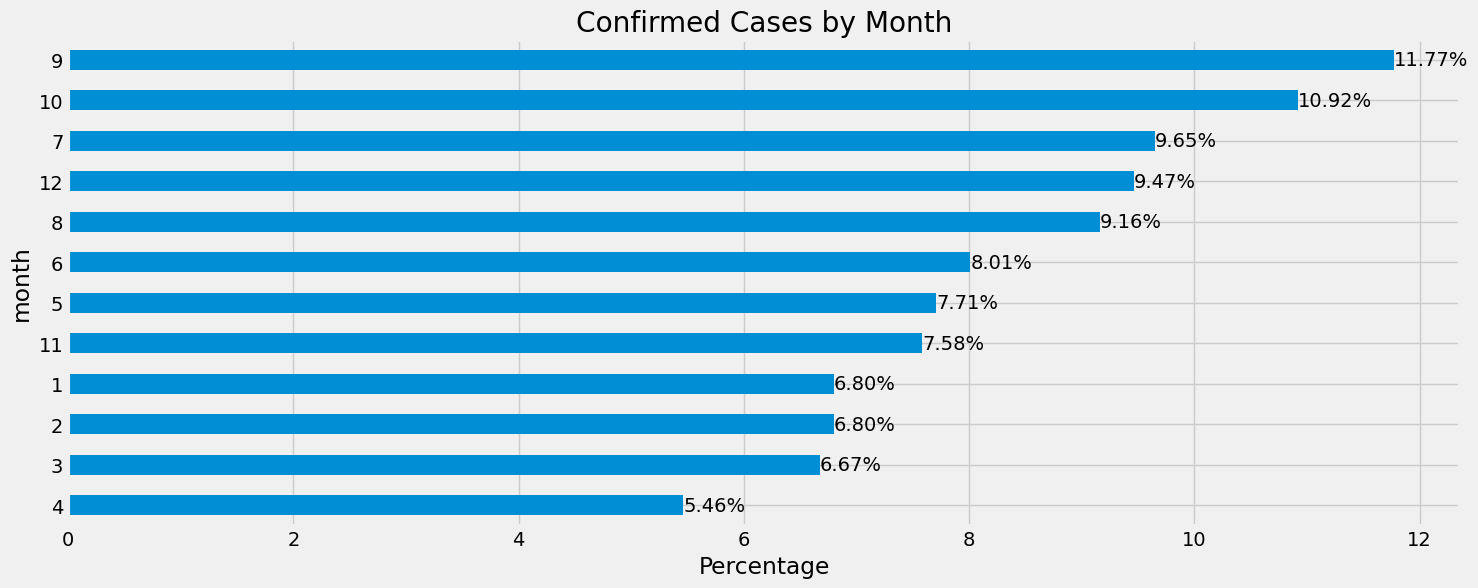

In [1092]:
ax=((feature['month'].value_counts(normalize=True)*100).sort_values()
    .plot(kind='barh',title='Confirmed Cases by Month',figsize=(16,6),xlabel='Percentage'))
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.show()

*September has the highest number of confirmed death cases followed closely by October*

**ii) Correlation**

*Correlation Matrix*

In [1093]:
feature[['date','year','month','day','cases']].corr()

,date,year,month,day,cases
date,1.000000,0.674674,0.367525,-0.008158,0.075144
year,0.674674,1.000000,-0.435635,-0.045187,0.124125
month,0.367525,-0.435635,1.000000,-0.037702,-0.064361
day,-0.008158,-0.045187,-0.037702,1.000000,-0.006856
cases,0.075144,0.124125,-0.064361,-0.006856,1.000000


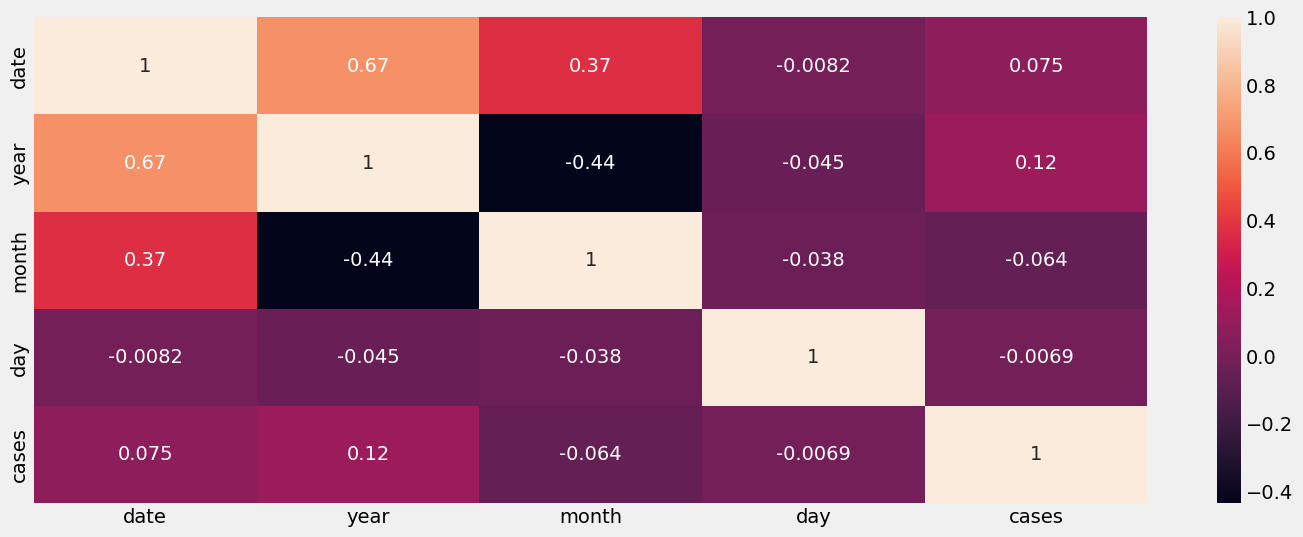

In [1094]:
plt.figure(figsize=(16,6))
sns.heatmap(feature[['date','year','month','day','cases']].corr(),annot=True)
plt.show()

*Number of confirmed death cases has a low correlation with both year and date.<br/>
Although the correlation with date is much lower compared to year.*

*Correlation Coefficient*

In [1095]:
from scipy.stats import pearsonr
corr,p_value=pearsonr(feature['year'],feature['cases'])
print(f"Correlation Coefficient : {corr}\nP-Value : {p_value}")

Correlation Coefficient : 0.1241247813385378
P-Value : 4.311788000841708e-07


*Since the p-value is less than 0.001, there is a strong certainty in the correlation coefficient.*

**Chi-Square Test of Association**

*Null Hypothesis : There is no association between Year and Number of Confirmed Death Cases*<br/>
*Alternate Hypothesis : There is an association between Year and Number of Confirmed Death Cases.*

In [1096]:
from scipy.stats import chi2_contingency
res=chi2_contingency(feature[['month','cases']])
print(f"Chi-Square Statistic : {res.statistic}\nP-Value : {res.pvalue}\nDegree of Freedom : {res.dof}")

Chi-Square Statistic : 750131.8965509662
P-Value : 0.0
Degree of Freedom : 1647


In [1134]:
if res.pvalue < 0.05 :
    print('True')
else :
    print('False')

True


*Using a significance level of 5%, we reject the null hypothesis in favour of the alternate hypothesis which states there <br/> is an association between year and number of confirmed cases*

**Regression Plot**

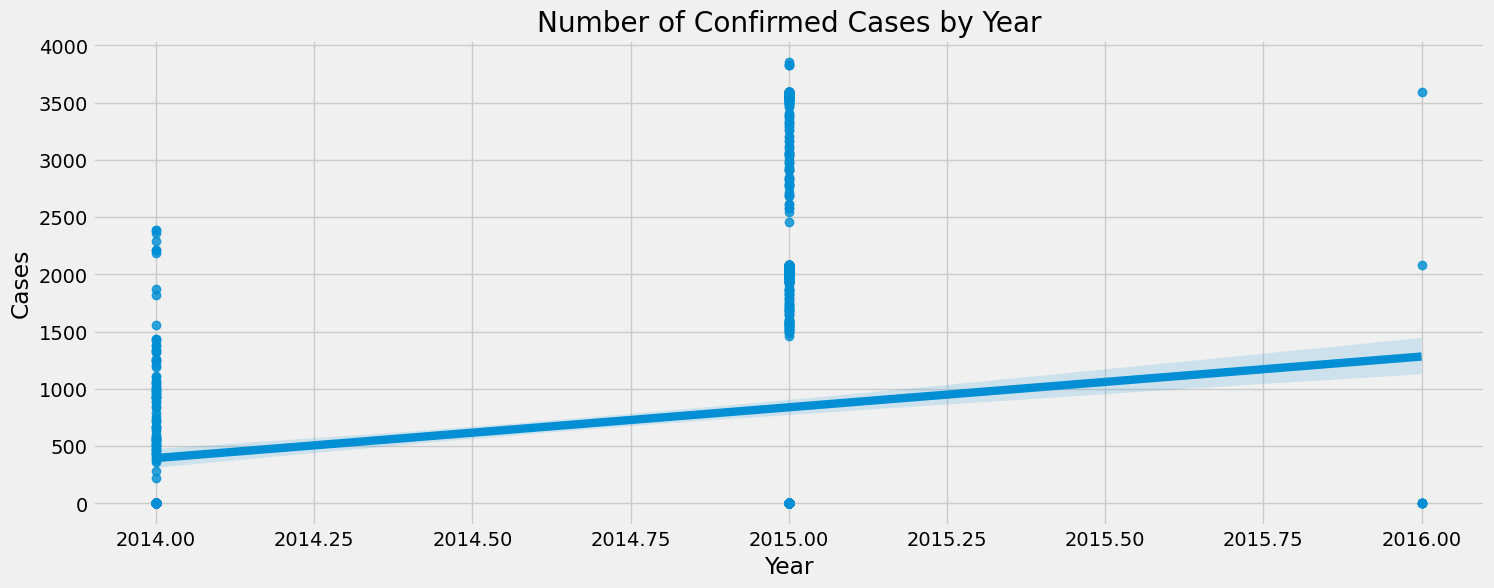

In [1098]:
plt.figure(figsize=(16,6))
sns.regplot(x=feature['year'],y=feature['cases'])
plt.title('Number of Confirmed Cases by Year')
plt.xlabel('Year')
plt.ylabel('Cases')
plt.show()

*Low positive correlation between year and number of confirmed death cases*

#### ****5) Exploring Binary and Categorical Data****

**Contigency Table**

In [1099]:
contigency_table=pd.pivot_table(data=feature,index='year',columns=['month'],fill_value='No Deaths',values='cases',aggfunc=['sum'])

In [1100]:
contigency_table

sum                                                         \
month         1          2          3          4          5          6    
year                                                                      
2014   No Deaths  No Deaths  No Deaths  No Deaths  No Deaths  No Deaths   
2015       89395      99465      87035      81808     116170     122889   
2016   No Deaths  No Deaths       5684  No Deaths  No Deaths  No Deaths   

                                                                         
month         7          8          9          10         11         12  
year                                                                     
2014   No Deaths        898      12330      18002      13723      39738  
2015      129858     119039     124880      96568      62502      68195  
2016   No Deaths  No Deaths  No Deaths  No Deaths  No Deaths  No Deaths

*2015 had the highest number of confirmed death cases compared to 2016 where the only cases confirmed were in March.*

**BoxPlot**

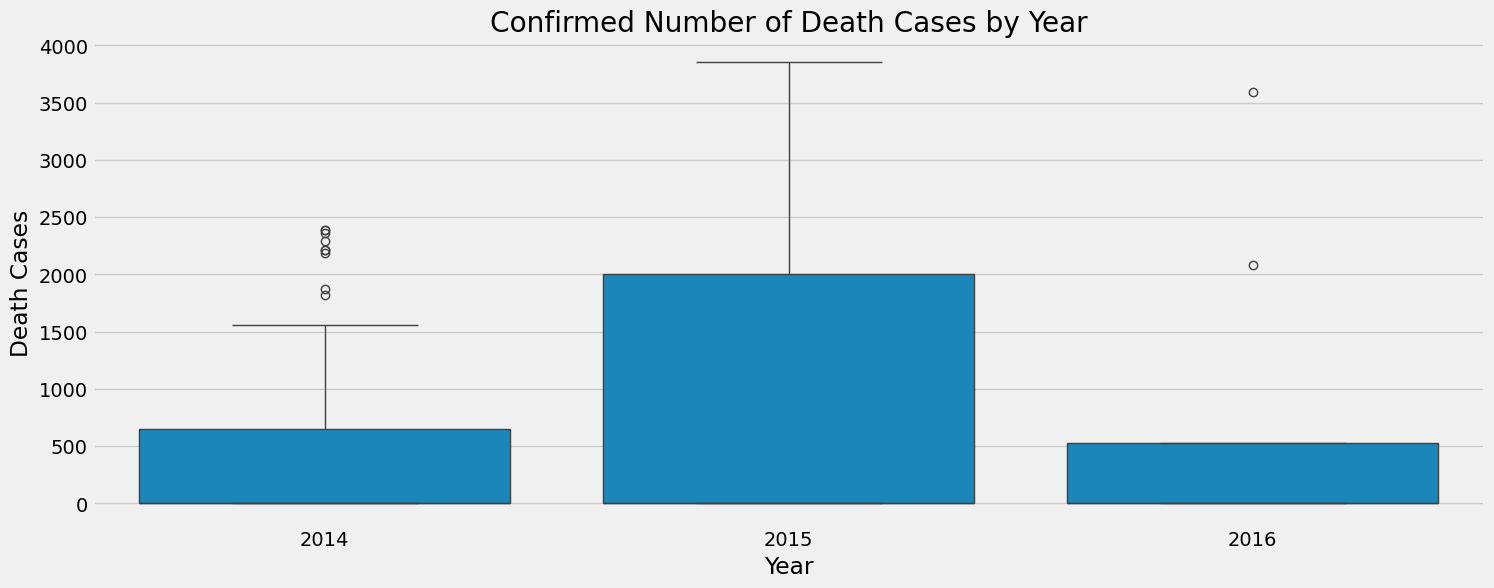

In [1101]:
plt.figure(figsize=(16,6))
sns.boxplot(x=feature['year'],y=feature['cases'])
plt.title('Confirmed Number of Death Cases by Year')
plt.xlabel('Year')
plt.ylabel('Death Cases')
plt.show()

*2015 is greatly distributed which suggests high number of confirmed death cases.*

## ****Outlier Detection & Removal Using Interquartile Range****

**Calculate the Interquartile Range (IQR)**

In [1102]:
IQR=np.subtract(iqr1,iqr2)

**Set the Upper & Lower Limit for Outlier Detection**

In [1103]:
upper_limit= iqr1 + 1.5*IQR
lower_limit= iqr2 - 1.5*IQR
print(f"Upper Limit : {upper_limit:,.0f}\nLower Limit : {lower_limit}")

Upper Limit : 4,402
Lower Limit : -2641.125


**Query Outliers in the Dataset**

In [1104]:
data.loc[(data['cases'] > upper_limit) | (data['cases'] < lower_limit)]

,indicator,country,date,cases


*There are no outliers in the dataset*

**Query data with no Outliers**

In [1105]:
data.loc[(data['cases'] <= upper_limit) & (data['cases'] >= lower_limit)]

,indicator,country,date,cases
0,Cumulative number of confirmed Ebola deaths,Guinea,2015-03-10,1778
1,Cumulative number of confirmed Ebola deaths,Sierra Leone,2015-03-10,3263
2,Cumulative number of confirmed Ebola deaths,Nigeria,2015-03-10,7
3,Cumulative number of confirmed Ebola deaths,Senegal,2015-03-10,0
4,Cumulative number of confirmed Ebola deaths,Spain,2015-03-10,0
...,...,...,...,...
1643,Cumulative number of confirmed Ebola deaths,Guinea,2016-03-23,1
1644,Cumulative number of confirmed Ebola deaths,Nigeria,2016-03-23,7
1645,Cumulative number of confirmed Ebola deaths,Senegal,2016-03-23,0
1646,Cumulative number of confirmed Ebola deaths,Spain,2016-03-23,0


## ****Model Development****

#### ****Dependencies****

In [1106]:
import xgboost as xgb 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

#### ****Feature Creation****

In [1107]:
data.set_index('date',inplace=True)
def create_dataframe(df):
    data['year']=data.index.year  
    data['month']=data.index.month 
    data['dayofweek']=data.index.dayofweek
    data['dayofyear']=data.index.dayofyear
    data['day']=data.index.day
    data['hour']=data.index.hour
    data['minute']=data.index.minute
    data['secs']=data.index.second
    return df

In [1108]:
data=create_dataframe(data)

#### ****Split the Data into Train/Test sets****

In [1110]:
train=data[data.index < '2015-09-01'][['country','year','month','dayofyear','dayofweek','day','cases']].reset_index(drop=True)
test=data[data.index >= '2015-09-01'][['country','year','month','dayofyear','dayofweek','day','cases']].reset_index(drop=True)

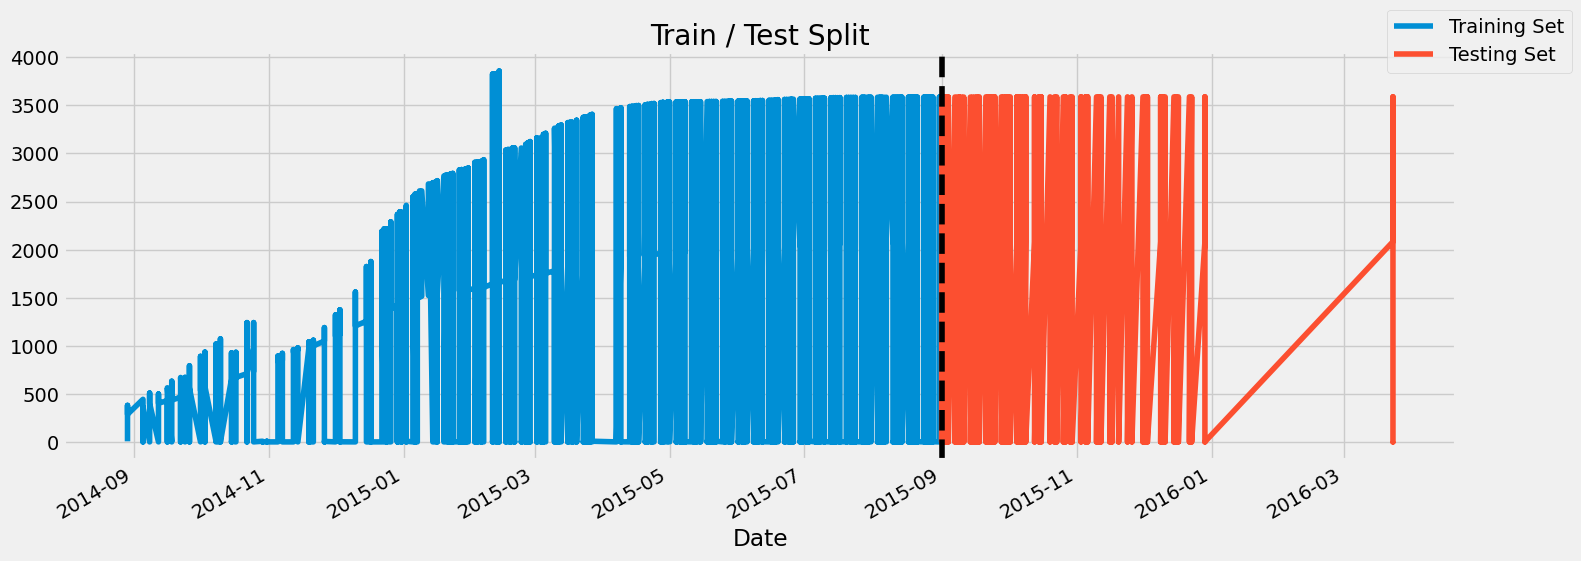

In [1132]:
training=data.loc[data.index < '2015-09-01']
testing=data.loc[data.index >= '2015-09-01']

fig,ax=plt.subplots(figsize=(16,6))
training.plot(ax=ax,label='Training Set',y='cases')
testing.plot(ax=ax,label='Testing Set',y='cases')
ax.axvline('2015-09-01',color='black',ls='--')
plt.title('Train / Test Split')
plt.xlabel('Date')
plt.legend(loc=[0.95,0.95])
plt.show()

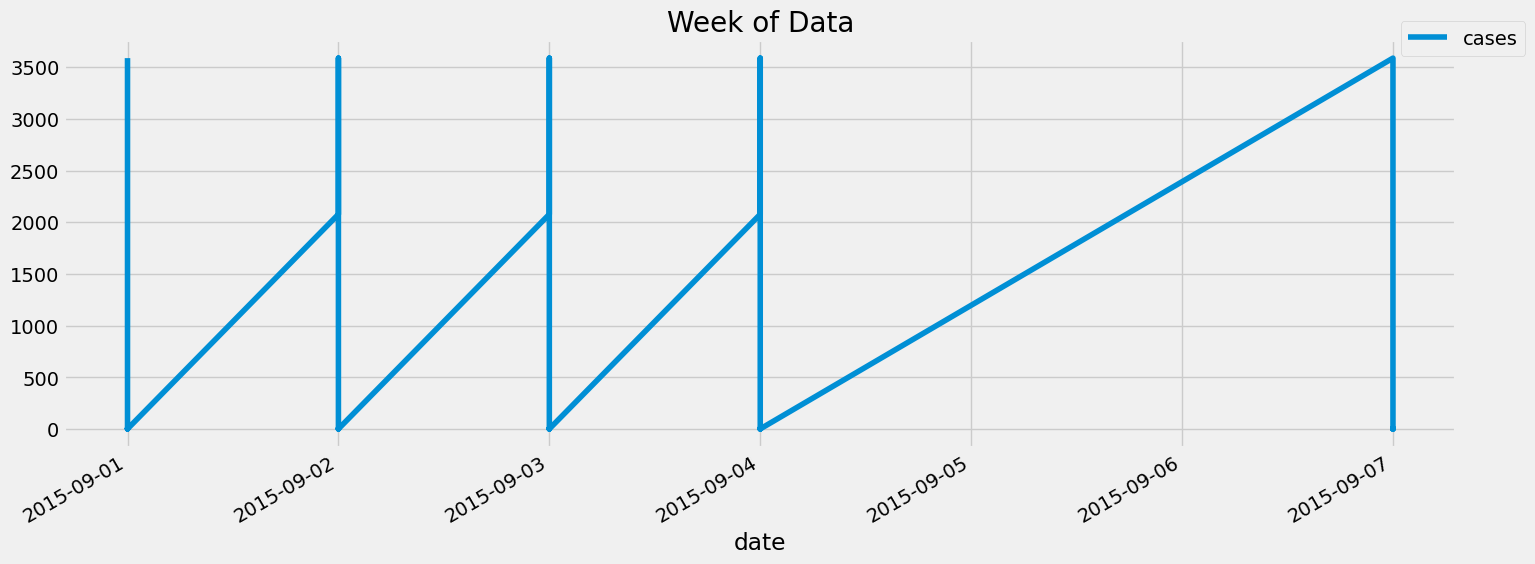

In [1112]:
data.loc[(data.index >= '2015-09-01') & (data.index <= '2015-09-07')].plot(y='cases',figsize=(16,6),title='Week of Data')
plt.legend(loc=[0.96,0.96])
plt.show()

*There is a steep increase in number of confirmed cases from 4th September to 7th September 2015*

#### ****Encoding****

In [1113]:
def encode(df):
    df['country']=df['country'].apply(lambda x : 0 if x == 'Guinea'
                                        else 1 if x == 'Sierra Leone'
                                        else 2 if x == 'Nigeria'
                                        else 3 if x == 'Senegal'
                                        else 4 if x == 'United States of America'
                                        else 5 if x == 'Spain'
                                        else 6 if x == 'Liberia'
                                        else 7 if x == 'Mali'
                                        else 8 if x == 'United Kingdom'
                                        else 9
                                        )

In [1114]:
encode(train)
encode(test)

#### ****Choose X and y Variables****

In [1115]:
X_train=train.drop(columns=['cases'],axis=1)
y_train=train['cases']

X_test=test.drop(columns=['cases'],axis=1)
y_test=test['cases']

#### ****Model Development****

**i) Cross Validation**

In [1116]:
param_grid={
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.5,0.01],
    'gamma':[0,1.0,10.0],
    'reg_lambda':[0,1.0,10.0]
}

optional_param=GridSearchCV(
    estimator=xgb.XGBRegressor(n_estimators=500),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=2,
    n_jobs=5
    ,cv=5
)

optional_param.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],early_stopping_rounds=5,verbose=10)

print(f"Best Parameters : {optional_param.best_params_}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[0]	validation_0-rmse:1107.20721	validation_1-rmse:1218.42773
[10]	validation_0-rmse:445.72254	validation_1-rmse:509.24152
[20]	validation_0-rmse:248.68027	validation_1-rmse:271.00501
[30]	validation_0-rmse:183.30281	validation_1-rmse:198.32633
[40]	validation_0-rmse:154.92558	validation_1-rmse:170.93362
[50]	validation_0-rmse:140.28139	validation_1-rmse:176.45353
[53]	validation_0-rmse:138.46042	validation_1-rmse:175.92088
Best Parameters : {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 0}


In [1117]:
model=xgb.XGBRegressor(n_estimators=500,max_depth=3,gamma=0,learning_rate=0.1,reg_lambda=0)
model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],early_stopping_rounds=5,verbose=10)

[0]	validation_0-rmse:1107.20721	validation_1-rmse:1218.42773
[10]	validation_0-rmse:445.72254	validation_1-rmse:509.24152
[20]	validation_0-rmse:248.68027	validation_1-rmse:271.00501
[30]	validation_0-rmse:183.30281	validation_1-rmse:198.32633
[40]	validation_0-rmse:154.92558	validation_1-rmse:170.93362
[50]	validation_0-rmse:140.28139	validation_1-rmse:176.45353
[53]	validation_0-rmse:138.46042	validation_1-rmse:175.92088


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1118]:
y_pred=model.predict(X_test)
print(f"R2-Score : {r2_score(y_test,y_pred)*100:,.4f}%\nRoot Mean Squared Error : {np.sqrt(mean_squared_error(y_test,y_pred))}")

R2-Score : 98.4871%
Root Mean Squared Error : 164.90390776412158


**ii) Default Model no Parameter Tuning**

In [1119]:
model=xgb.XGBRegressor()
model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],early_stopping_rounds=5,verbose=10)

[0]	validation_0-rmse:864.45814	validation_1-rmse:977.85557
[10]	validation_0-rmse:29.70420	validation_1-rmse:273.86718
[14]	validation_0-rmse:10.16655	validation_1-rmse:279.21770


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1120]:
y_pred=model.predict(X_test)
print(f"R2-Score : {r2_score(y_test,y_pred)*100:,.4f}%\nRoot Mean Squared Error : {np.sqrt(mean_squared_error(y_test,y_pred))}")

R2-Score : 95.8272%
Root Mean Squared Error : 273.8671814331711


*Cross Validation produced a root mean squared error of 164 while the default model produced a root mean squared error of 273*

**ii) Build Model using CV Parameters**

In [1121]:
model=xgb.XGBRegressor(n_estimators=500,max_depth=3,gamma=0,learning_rate=0.1,reg_lambda=0)
model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],early_stopping_rounds=5,verbose=10)

[0]	validation_0-rmse:1107.20721	validation_1-rmse:1218.42773
[10]	validation_0-rmse:445.72254	validation_1-rmse:509.24152
[20]	validation_0-rmse:248.68027	validation_1-rmse:271.00501
[30]	validation_0-rmse:183.30281	validation_1-rmse:198.32633
[40]	validation_0-rmse:154.92558	validation_1-rmse:170.93362
[50]	validation_0-rmse:140.28139	validation_1-rmse:176.45353
[54]	validation_0-rmse:130.30010	validation_1-rmse:182.58943


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### ****Model Evaluation****

In [1133]:
y_pred=model.predict(X_test)
print(f"R2-Score : {r2_score(y_test,y_pred)*100:,.4f}%\nRoot Mean Squared Error : {np.sqrt(mean_squared_error(y_test,y_pred))}")

R2-Score : 98.4871%
Root Mean Squared Error : 164.90390776412158


**i) Feature Importances**

In [1123]:
imp=pd.DataFrame(
    data=model.feature_importances_,
    index=model.feature_names_in_,
    columns=['importances']
    )

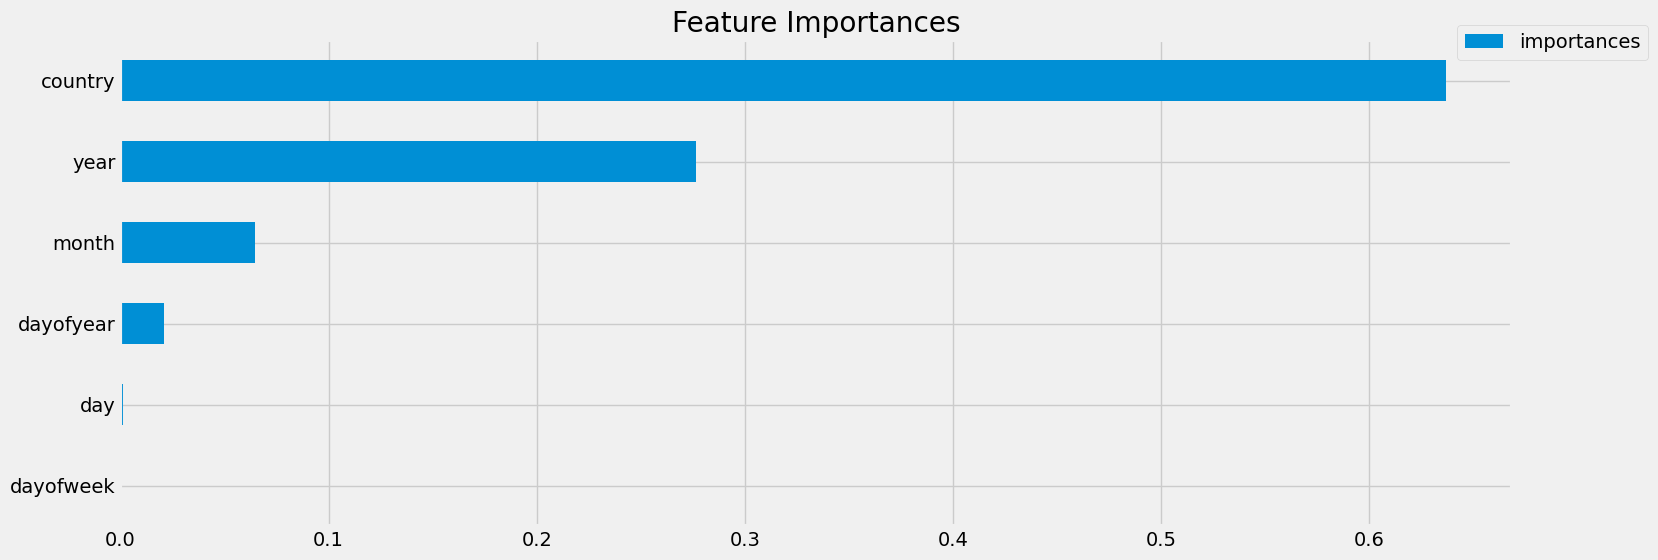

In [1124]:
imp.sort_values(by='importances').plot(kind='barh',figsize=(16,6),title='Feature Importances')
plt.legend(loc=[0.96,0.96])
plt.show()

*The model used country and year more often compared to day and day of week.*

**ii) LinePlot**

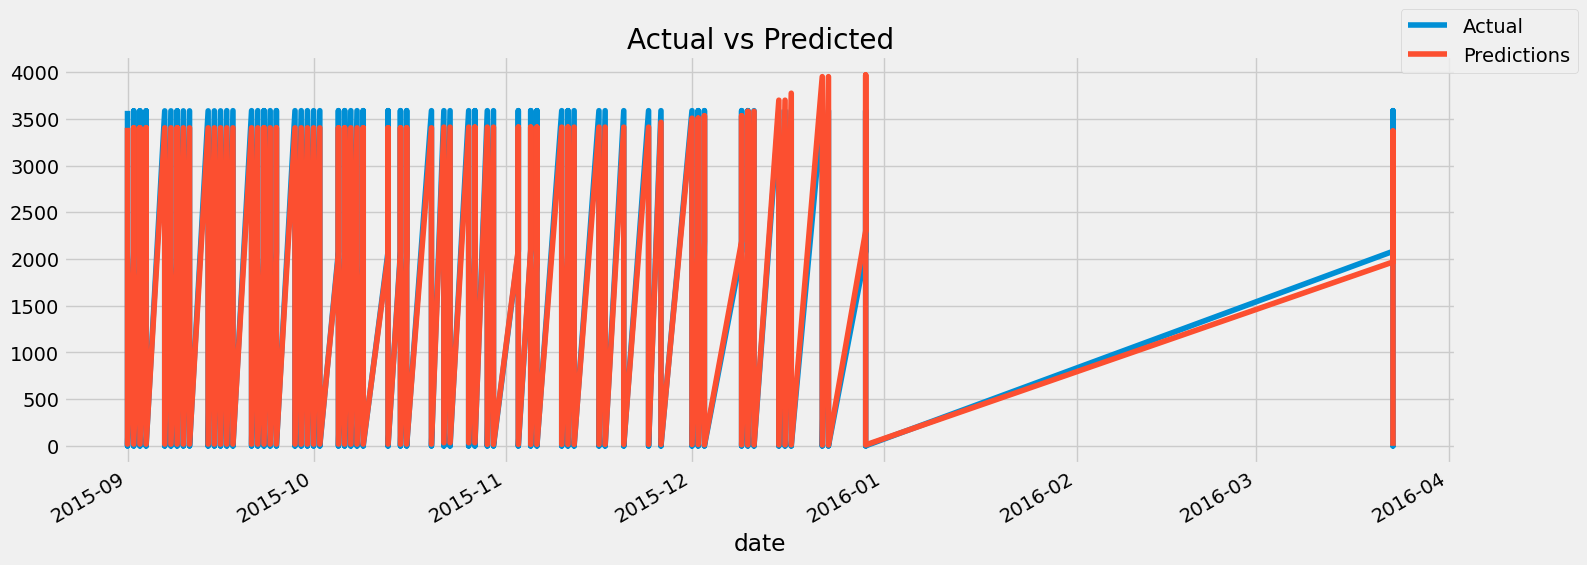

In [1125]:
testing['prediction']=y_pred
ax=testing['cases'].plot(figsize=(16,6))
testing['prediction'].plot(ax=ax,style='-')
plt.legend(['Actual','Predictions'],loc=[0.96,0.96])
ax.set_title('Actual vs Predicted')
plt.show()

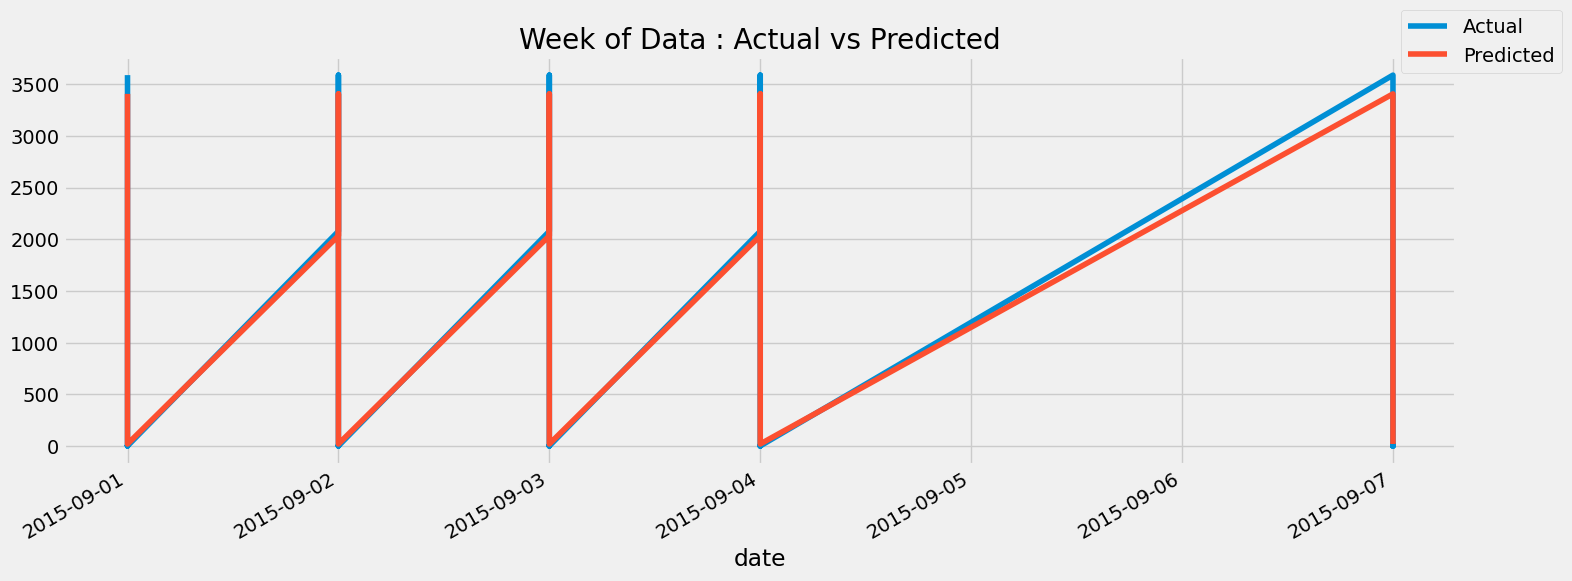

In [1126]:
ax=(testing.loc[(testing.index >= '2015-09-01') & (testing.index <= '2015-09-07')]['cases']
    .plot(figsize=(16,6),title='Week of Data : Actual vs Predicted'))
testing.loc[(testing.index >= '2015-09-01') & (testing.index <= '2015-09-07')]['prediction'].plot(figsize=(16,6)).plot(style='-',ax=ax)
plt.legend(['Actual','Predicted'],loc=[0.96,0.96])
plt.show()

In [1127]:
testing['error']=np.subtract(testing['cases'],testing['prediction'])

In [1135]:
testing.iloc[:5]

,indicator,country,cases,year,month,dayofweek,dayofyear,day,hour,minute,secs
date,,,,,,,,,,,
2015-09-01,Cumulative number of confirmed Ebola deaths,Sierra Leone,3587,2015,9,1,244,1,0,0,0
2015-09-01,Cumulative number of confirmed Ebola deaths,Guinea,2077,2015,9,1,244,1,0,0,0
2015-09-01,Cumulative number of confirmed Ebola deaths,Liberia,2,2015,9,1,244,1,0,0,0
2015-09-01,Cumulative number of confirmed Ebola deaths,Nigeria,7,2015,9,1,244,1,0,0,0
2015-09-01,Cumulative number of confirmed Ebola deaths,Senegal,0,2015,9,1,244,1,0,0,0


**Dates where model performed worst based on error.**

In [1129]:
testing.groupby('date')['error'].mean().sort_values(ascending=True).iloc[:5]

date
2016-03-23   -234.644992
2015-12-29   -134.251798
2015-12-22   -129.193623
2015-12-23   -129.193623
2015-12-17    -98.674038
Name: error, dtype: float64

**Dates where model performed best based on error.**

In [1130]:
testing.groupby('date')['error'].mean().sort_values(ascending=False).iloc[:5]

date
2015-10-16   -19.035505
2015-10-20   -19.035505
2015-10-15   -19.178362
2015-10-09   -19.178362
2015-10-08   -19.178362
Name: error, dtype: float64

#### ****Save Model****

In [1131]:
# import joblib 
# joblib.dump(model,'ebola.joblib')